In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted', color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')
# data.info()
# data.head(1)

In [3]:
data.duplicated().sum()
data.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False) #subset None or subset=['colname', 'colname2'], 
data.duplicated().sum()

0

In [4]:
mis_col = data.isna().sum() * 100/len(data)
mis_col.sort_values(ascending=False)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

# CREATE VARIABLE FOR DICTIONARY

In [5]:
#Assign new variables for the columns to be encoded
sex_val = data['sex']
smok_val = data['smoker']
reg_val = data['region']
# ori_data = data['sex', 'smoker', 'region']


#ENCODE THE DATA AND CREATE A DICTIONARY

In [6]:
cat_val = ['sex', 'smoker', 'region']
data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)
data.head(1)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


In [7]:
le_sex = data['sex']

In [8]:
ori_data_dic = np.unique(sex_val)
le_data_dic = np.unique(le_sex)
data_dic = dict(zip(ori_data_dic, le_data_dic))
data_dic

{'female': 0, 'male': 1}

EDA

In [9]:
data.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

C:\Users\amunv\AppData\Local\Temp\ipykernel_18024\2432912775.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax);


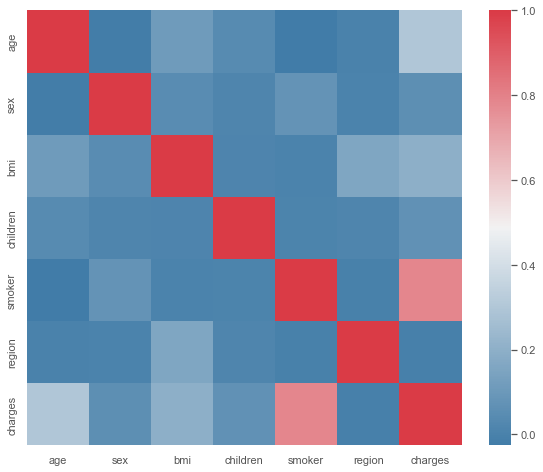

In [10]:
f,ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax);

<AxesSubplot:xlabel='charges', ylabel='Count'>

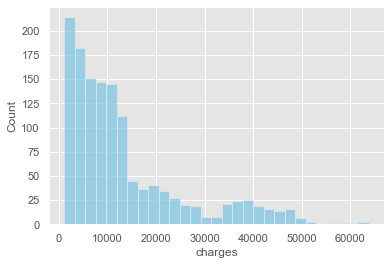

In [11]:
sns.histplot(data['charges'], color='c')

graph showing correlation between charges and either smoking or not smoking

Text(0.5, 1.0, 'Distribution of Charges for non smokers')

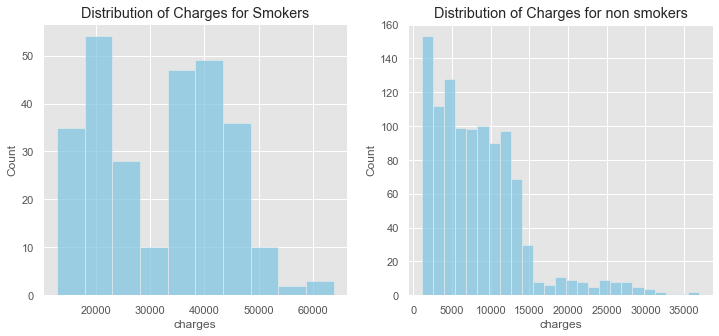

In [12]:
f = plt.figure(figsize=(12,5))

ax = f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]['charges'], color='c', ax=ax)
ax.set_title('Distribution of Charges for Smokers')

ax =f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'], color='c', ax=ax)
ax.set_title('Distribution of Charges for non smokers')

In [13]:
data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,3,16884.924


MODEL CREATION

In [14]:
X = data.drop(columns=['charges'], axis=1)
y = data['charges']


In [15]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


# SCALE THE DATA

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))
X


array([[-1.44041773, -1.00977099, -0.45315959, -0.90923416,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165, -0.07944162, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.58014347, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -0.90923416, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -0.90923416, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -0.90923416,  1.96966039,
        -0.46712816]])

#SPLIT THE DATA

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# LINEAR REGRESSION MODEL -- COZ Y IS NUMBERS FROM ORIGINAL DATA

In [18]:
#Assign Model to use
linreg = LinearRegression()
linreg.fit(x_train, y_train)

#Predict the model
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

#Measure performance of model
lin_train_r2 = r2_score(y_train, y_train_pred)
lin_test_r2 = r2_score(y_test, y_test_pred)
lin_train_mse = mean_squared_error(y_train,y_train_pred)
lin_test_mse = mean_squared_error(y_test, y_test_pred)

In [19]:
model_perf = pd.DataFrame([ 
    'LinearRegression', lin_train_r2, lin_test_r2, lin_train_mse, lin_test_mse
]).transpose()

model_perf.columns = ['Method', 'Training R2', 'Test R2', 'Training MSE', 'Test MSE']
model_perf


,Method,Training R2,Test R2,Training MSE,Test MSE
0,LinearRegression,0.742396,0.763172,0.244325,0.264637


# RANDOM FOREST REGRESSION 

In [20]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)

forest.fit(x_train,y_train) # The actual training
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

forest_mse_train = mean_squared_error(y_train,forest_train_pred)
forest_mse_test = mean_squared_error(y_test,forest_test_pred)
forest_r2_train = r2_score(y_train,forest_train_pred)
forest_r2_test =  r2_score(y_test,forest_test_pred)

C:\Users\amunv\AppData\Local\Temp\ipykernel_18024\4003415886.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train,y_train) # The actual training
c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [21]:
forest_model_perf = pd.DataFrame([ 
    'RandomForestRegressor', forest_mse_train, forest_mse_test, forest_r2_train, forest_r2_test
]).transpose()


forest_model_perf.columns = ['Method', 'Forest Mse Train', 'Forest Mse Test', 'Forest R2 Train', 'Forest R2 Test']
forest_model_perf

,Method,Forest Mse Train,Forest Mse Test,Forest R2 Train,Forest R2 Test
0,RandomForestRegressor,0.02407,0.164888,0.974622,0.852439
